<a href="https://colab.research.google.com/github/denisseantunez/AFND-E/blob/main/AFND_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automata Finito Determinista
Integrantes:

*   Ana Laura Chenoweth Galaz
*   Georgina Salcido Valenzuela
*   Denisse Gabriela Antunez López




# **Autómatas**

**Ejemplo:** Sea L = {ab, cd} un lenguaje del alfabeto {a, b, c, d}.

El autómata que acepta a L = {ab, cd} sería:

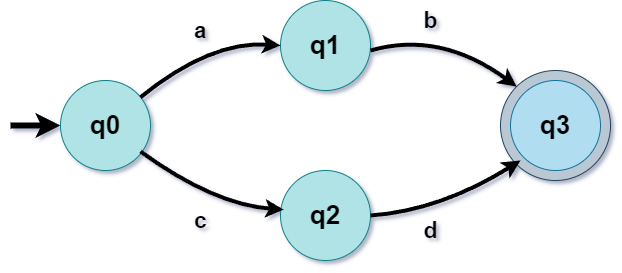

In [ ]:
## Autómata que solo acepta {ab, cd} ...
class Automata:
  def __init__(self, Q, alfabeto, transicion, estado_inicial, F):
      self.Q = Q
      self.alfabeto = alfabeto
      self.transicion = transicion
      self.estado_inicial = estado_inicial
      self.F = F


  def acepta(self, cadena): # devuelve true si la cadena es aceptada y false en el caso contrario
      estado_actual = estado_inicial
      for simbolo in cadena:
        if (estado_actual, simbolo) not in self.transicion:
          return False
        estado_actual = self.transicion[(estado_actual, simbolo)]
      return  estado_actual in self.F


# Definir el Automata
Q = {'q0', 'q1', 'q2', 'q3'}
alfabeto = {'a', 'b', 'c', 'd'}
transicion = {
  ('q0' , 'a') : 'q1',
  ('q0' , 'c') : 'q2',
  ('q1' , 'b') : 'q3',
  ('q2' , 'd') : 'q3',
}

estado_inicial = 'q0'
F = 'q3'

automata = Automata(Q, alfabeto, transicion, estado_inicial, F)

# Verificar si la cadena es aceptada
cadena_1 = "ab"
print(cadena_1, automata.acepta(cadena_1))

ab True


# **Autómata Finito No Determinista con transiciones instantáneas**

Son un tipo especial de autómata no-determinista que permite transiciones entre estados sin necesidad de consumir símbolos de entrada. Es decir usan la cadena vacia (epsilon) como señal aún cuando no es parte del alfabeto.

## **Función de transición**

Dado un estado y la cadena vacía ε, el autómata puede cambiar instantáneamente a otro conjunto de estados.

**DOMINIO DE LA FUNCIÓN:**


> Q x Σ ∪ {ε} → P(Q)




## **Clausura de epsilon**

Es el conjunto de estados a los que se puede llegar desde un estado dado q mediante transiciones epsilon.

Es decir, transiciones que no consumen simbolos de entrada

Los estados a los que se puede llegar desde un estado q específico mediante transiciones epsilon.

## **Ejemplos**

## AFND-ε que acepte a L∗ del ejemplo anterior como lenguaje:

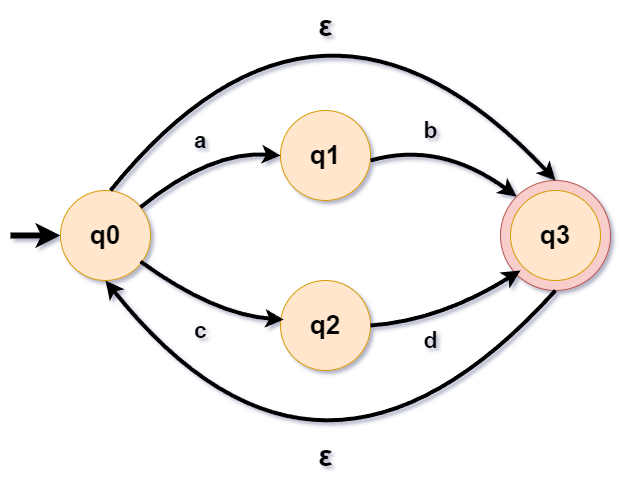

In [ ]:
class AFND_epsilon:
    def __init__(Auto, Q, alfabeto, delta, estado_inicial, F):
        Auto.Q = Q
        Auto.alfabeto = alfabeto
        Auto.delta = delta
        Auto.estado_actual = Auto.clau_epsilon({estado_inicial})  # Inicializar con la clausura epsilon del estado inicial
        Auto.estado_inicial = estado_inicial
        Auto.F = F

# Método para realizar transiciones
    def trancision(Auto, Q, senal):
        sig_Q = set() #Inicializar un conjunto para los estados alcanzables
        for estado in Q:
          # Verificar si hay transición desde el estado actual con el símbolo de entrada
            if (estado, senal) in Auto.delta:
              # Agregar los estados alcanzables a sig_Q se agrega al set
                sig_Q.update(Auto.delta[(estado, senal)])
        # Calcular la clausura epsilon del conjunto de estados alcanzables
        return Auto.clau_epsilon(sig_Q)

 # Método para calcular la clausura epsilon
    def clau_epsilon(Auto, sig_Q): # Inicializar la clausura epsilon con el conjunto de estados alcanzables
        clausura = set(sig_Q) # Inicializar una pila con los estados alcanzables
        pila = list(sig_Q) # pila con los estados por los que pasa
        while pila: #  Mientras la pila no esté vacía
            estado = pila.pop() # Agarra el estado del tope de la pila
            if (estado, '') in Auto.delta: # Verificar si hay transición epsilon desde el estado actual
            # Recorrer los estados alcanzables mediante transiciones epsilon
                for epsilon_estado in Auto.delta[(estado, '')]:
                    #Si los estados alcanzables mediante epsilon no están en la clausura
                    if epsilon_estado not in clausura:
                        clausura.add(epsilon_estado)# Agregar el estado alcanzable a la clausura epsilon
                        pila.append(epsilon_estado)# Agregar el estado alcanzable a la pila para su exploración
        return clausura

 # Método para verificar si el estado actual es de aceptación
    def es_aceptada(Auto):
        return any(estado in Auto.F for estado in Auto.estado_actual)
        #para determinar si algún estado en el conjunto Auto.estado_actual
        #e es un bucle que itera sobre cada estado en el conjunto Auto.estado_actual


# Definir el AFND-ε
Q = {'q0', 'q1', 'q2', 'q3'}
alfabeto = {'a', 'b', 'c', 'd'}
trancision_function = {
    ('q0', ''): {'q3'},
    ('q0', 'a'): {'q1'},
    ('q0', 'c'): {'q2'},
    ('q1', 'b'): {'q3'},
    ('q2', 'd'): {'q3'},
    ('q3', ''): {'q0'}
}
estado_inicial = 'q0'
F = {'q3'}

AFND_epsilon = AFND_epsilon(Q, alfabeto, trancision_function, estado_inicial, F)


# Ejemplo de cadena de entrada
cadena = 'ababcdabcdabcd'

# Procesamiento de la cadena de entrada
for simbolo in cadena:
    AFND_epsilon.estado_actual = AFND_epsilon.trancision(AFND_epsilon.estado_actual, simbolo)

# Verificar si la cadena es aceptada
if AFND_epsilon.es_aceptada():
  # Si el estado actual es de aceptación, imprimir un mensaje indicando que la cadena es aceptada
    print("La cadena es aceptada por el AFND-ε.")
else:
  # Si el estado actual no es de aceptación, imprimir un mensaje indicando que la cadena no es aceptada
    print("La cadena no es aceptada por el AFND-ε.")

La cadena es aceptada por el AFND-ε.


# AFND-ε que acepta a las cadenas binarias que acaban en 11 o en 00.


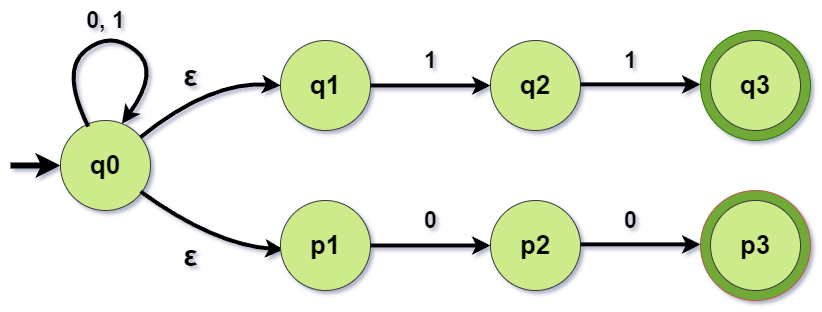

In [ ]:
class AFND_epsilon:
    def __init__(Auto, Q, alfabeto, delta, estado_inicial, F):
        Auto.Q = Q
        Auto.alfabeto = alfabeto
        Auto.delta = delta
        Auto.estado_actual = Auto.clau_epsilon({estado_inicial})  # Inicializar con la clausura epsilon del estado inicial
        Auto.estado_inicial = estado_inicial
        Auto.F = F

    def trancision(Auto, Q, senal):
        sig_Q = set() #Inicializar un conjunto para los estados alcanzables
        for estado in Q:
            # Verificar si hay transición desde el estado actual con el símbolo de entrada
            if (estado, senal) in Auto.delta:
                # Agregar los estados alcanzables a sig_Q se agrega al set
                sig_Q.update(Auto.delta[(estado, senal)]) # si pasa por ese estado, se agrega al set
        # Calcular la clausura epsilon del conjunto de estados alcanzables
        return Auto.clau_epsilon(sig_Q)

    def clau_epsilon(Auto, sig_Q):
        clausura = set(sig_Q) # set con los estados por los que pasa
        pila = list(sig_Q) # pila con los estados por los que pasa
        while pila: # mientras la pila no esté vacía
            estado = pila.pop() # Agarra el estado del tope de la pila
            if (estado, '') in Auto.delta: # Verificar si hay transición epsilon desde el estado actual
            # Recorrer los estados alcanzables mediante transiciones epsilon
                for epsilon_estado in Auto.delta[(estado, '')]:
                    #Si los estados alcanzables mediante epsilon no están en la clausura
                    if epsilon_estado not in clausura:
                        clausura.add(epsilon_estado) # Agregar el estado alcanzable a la clausura epsilon
                        pila.append(epsilon_estado) # Agregar el estado alcanzable a la pila para su exploración
        return clausura

    # Método para verificar si el estado actual es de aceptación
    def es_aceptada(Auto):
        return any(estado in Auto.F for estado in Auto.estado_actual)
        #para determinar si algún estado en el conjunto Auto.estado_actual
        #e es un bucle que itera sobre cada estado en el conjunto Auto.estado_actual

# Definir el AFND-ε
Q = {'q0', 'q1', 'q2', 'q3', 'p1', 'p2', 'p3'}
alfabeto = {'0', '1'}
trancision_function = {
    ('q0', ''): {'q1', 'p1'},
    ('q0', '0'): {'q0'},
    ('q0', '1'): {'q0'},
    ('q1', '1'): {'q2'},
    ('q2', '1'): {'q3'},
    ('p1', '0'): {'p2'},
    ('p2', '0'): {'p3'}
}
estado_inicial = 'q0'
F = {'q3', 'p3'}

AFND_epsilon = AFND_epsilon(Q, alfabeto, trancision_function, estado_inicial, F)


# Ejemplo de cadena de entrada
cadena = '00011'

# Procesamiento de la cadena de entrada
for simbolo in cadena:
    AFND_epsilon.estado_actual = AFND_epsilon.trancision(AFND_epsilon.estado_actual, simbolo)

# Verificar si la cadena es aceptada
if AFND_epsilon.es_aceptada():
    print("La cadena es aceptada por el AFND-ε.")
else:
    print("La cadena no es aceptada por el AFND-ε.")

La cadena es aceptada por el AFND-ε.


# AFND-ε que acepta cadenas cuya terminación sea a lo más dos veces la última letra

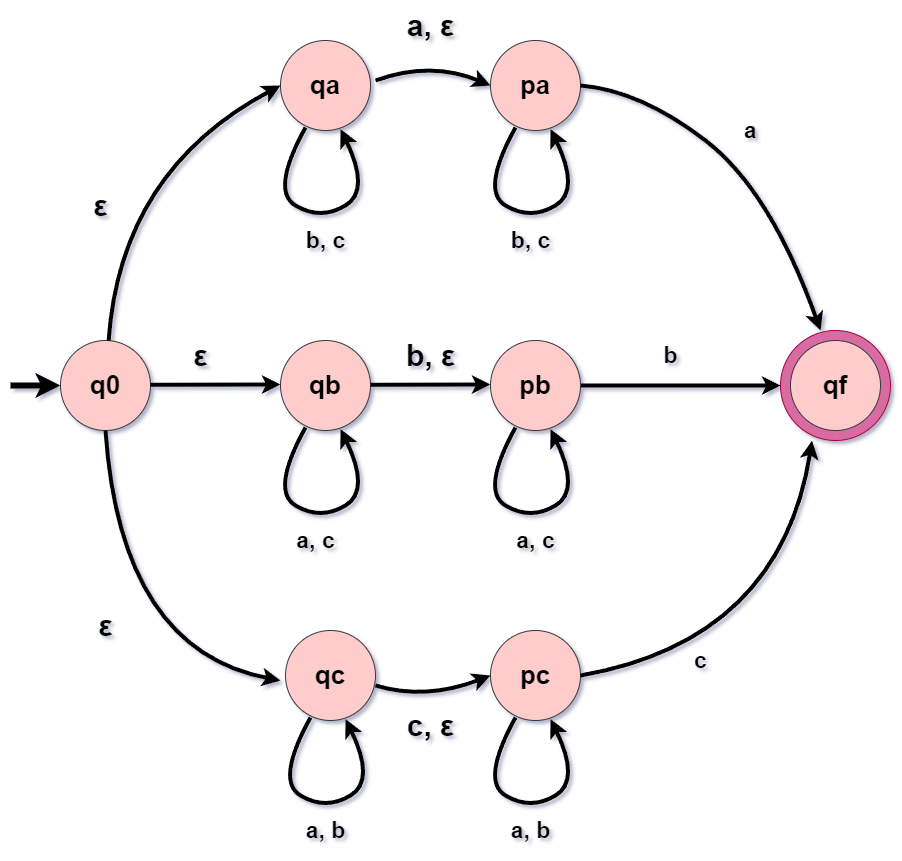

In [ ]:
class AFND_epsilon:
    def __init__(self, Q, alfabeto, delta, estado_inicial, F):
        self.Q = Q
        self.alfabeto = alfabeto
        self.delta = delta
        self.estado_actual = self.clau_epsilon({estado_inicial})
        self.estado_inicial = estado_inicial
        self.F = F

    def trancision(self, Q, senal):
        sig_Q = set()
        for estado in Q:
            if (estado, senal) in self.delta:
                sig_Q.update(self.delta[(estado, senal)])
        return self.clau_epsilon(sig_Q)

    def clau_epsilon(self, sig_Q):
        clausura = set(sig_Q)
        pila = list(sig_Q)
        while pila:
            estado = pila.pop()
            if (estado, '') in self.delta:
                for epsilon_estado in self.delta[(estado, '')]:
                    if epsilon_estado not in clausura:
                        clausura.add(epsilon_estado)
                        pila.append(epsilon_estado)
        return clausura

    def es_aceptada(self):
        return any(estado in self.F for estado in self.estado_actual)


# Definir el AFND-ε
Q = {'q0', 'qa', 'pa', 'qb', 'pb', 'qc', 'pc', 'qf'}
alfabeto = {'a', 'b', 'c'}
trancision_function = {
    ('q0', ''): {'qa', 'qb', 'qc'},
    ('qa', 'b'): {'qa'},
    ('qa', 'c'): {'qa'},
    ('qa', 'a'): {'pa'},
    ('qa', ''): {'pa'},
    ('qb', 'a'): {'qb'},
    ('qb', 'c'): {'qb'},
    ('qb', 'b'): {'pb'},
    ('qb', ''): {'pb'},
    ('qc', 'a'): {'qc'},
    ('qc', 'b'): {'qc'},
    ('qc', 'c'): {'pc'},
    ('qc', ''): {'pc'},
    ('pa', 'b'): {'pa'},
    ('pa', 'c'): {'pa'},
    ('pa', 'a'): {'qf'},
    ('pb', 'a'): {'pb'},
    ('pb', 'c'): {'pb'},
    ('pb', 'b'): {'qf'},
    ('pc', 'a'): {'pc'},
    ('pc', 'b'): {'pc'},
    ('pc', 'c'): {'qf'},
}
estado_inicial = 'q0'
F = {'qf'}

AFND_epsilon_instance = AFND_epsilon(Q, alfabeto, trancision_function, estado_inicial, F)

# Ejemplo de cadena de entrada
cadena = 'bcaa'

# Procesamiento de la cadena de entrada
for simbolo in cadena:
    AFND_epsilon_instance.estado_actual = AFND_epsilon_instance.trancision(AFND_epsilon_instance.estado_actual, simbolo)

# Verificar si la cadena es aceptada
if AFND_epsilon_instance.es_aceptada():
    print("La cadena es aceptada por el AFND-ε")
else:
    print("La cadena no es aceptada por el AFND-ε.")


La cadena es aceptada por el AFND-ε
